# **Price European Options with Black-Scholes**

This project implements the Black-Scholes model to price European Call and Put options. It calculates option prices based on the underlying asset's current price, strike price, time to maturity, risk-free rate, and volatility. Additionally, the project includes a Monte Carlo Simulation to compare pricing results with the Black-Scholes model.

As a bonus, the project demonstrates how to reverse-engineer Implied Volatility from market option prices, offering a practical approach to estimating the volatility needed for option pricing.

We'll price European Call and Put Options using Black-Scholes formula.

Black-Scholes Formulas:

$$   
\
\begin{aligned}
\text{Call Option Price:} \quad & C = S_0 N(d_1) - K e^{-rT} N(d_2) \\
\\
\text{Put Option Price:} \quad & P = K e^{-rT} N(-d_2) - S_0 N(-d_1) \\
\\
\text{where} \quad
d_1 &= \frac{ \ln\left( \frac{S_0}{K} \right) + \left( r + \frac{\sigma^2}{2} \right)T }{ \sigma \sqrt{T} } \\
\\
d_2 &= d_1 - \sigma \sqrt{T}
\end{aligned}
\
$$

**Black-Scholes Pricing Function**

In [1]:
import numpy as np
from scipy.stats import norm

def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    """
    S: Current stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free rate
    sigma: Volatility
    option_type: 'call' or 'put'
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return price


**Monte Carlo Pricing of the Same Option**

In [2]:
def monte_carlo_price(S, K, T, r, sigma, option_type='call', n_simulations=100000):
    """
    Monte Carlo simulation for European option pricing.
    """
    np.random.seed(42)  # for reproducibility

    Z = np.random.standard_normal(n_simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)

    price = np.exp(-r * T) * np.mean(payoff)

    return price


**Reverse-Engineer Implied Volatility**

Given a market-observed option price, we can solve for the volatility (σ) that makes the BSM formula match the market price.

We use scipy.optimize:

In [3]:
from scipy.optimize import brentq

def implied_volatility(S, K, T, r, market_price, option_type='call'):
    """
    Solve for implied volatility given market option price.
    """
    func = lambda sigma: black_scholes_price(S, K, T, r, sigma, option_type) - market_price
    implied_vol = brentq(func, 1e-6, 5)  # Search between 0.000001 and 500% vol
    return implied_vol


**We test the functions with the following values**

In [4]:
S = 100  # Current stock price
K = 105  # Strike price
T = 1    # 1 year to maturity
r = 0.05 # 5% risk-free rate
sigma = 0.2  # 20% volatility


In [5]:
# Black-Scholes Price
bs_price = black_scholes_price(S, K, T, r, sigma, option_type='call')

# Monte Carlo Price
mc_price = monte_carlo_price(S, K, T, r, sigma, option_type='call')

# Assume a market observed price
market_price = 7.5
implied_vol = implied_volatility(S, K, T, r, market_price, option_type='call')

print(f"Black-Scholes Price: {bs_price:.4f}")
print(f"Monte Carlo Price: {mc_price:.4f}")
print(f"Implied Volatility (from market price): {implied_vol:.4f}")


Black-Scholes Price: 8.0214
Monte Carlo Price: 8.0416
Implied Volatility (from market price): 0.1869


# **Full Code — Pricing European Options with Black-Scholes + Monte Carlo + Implied Volatility**

📈 Black-Scholes Call Price: 8.0214
🎲 Monte Carlo Call Price: 8.0416
🔍 Implied Volatility (from market price 7.5): 0.1869


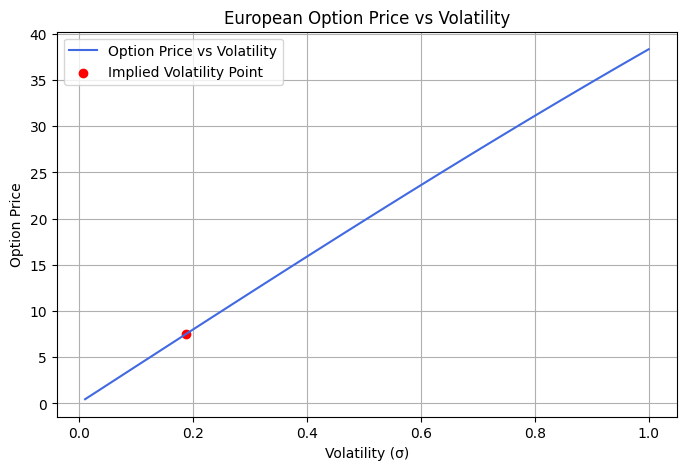

In [6]:


import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# --- Black-Scholes Pricing Function ---
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return price

# --- Monte Carlo Pricing Function ---
def monte_carlo_price(S, K, T, r, sigma, option_type='call', n_simulations=100000):
    np.random.seed(42)
    Z = np.random.standard_normal(n_simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)

    price = np.exp(-r * T) * np.mean(payoff)
    return price

# --- Implied Volatility Solver ---
def implied_volatility(S, K, T, r, market_price, option_type='call'):
    func = lambda sigma: black_scholes_price(S, K, T, r, sigma, option_type) - market_price
    implied_vol = brentq(func, 1e-6, 5)  # bounds between near-zero and 500% volatility
    return implied_vol

# --- Parameters ---
S = 100          # Current stock price
K = 105          # Strike price
T = 1            # Time to maturity (in years)
r = 0.05         # Risk-free rate (5%)
sigma = 0.2      # Volatility (20%)
option_type = 'call'  # 'call' or 'put'

# --- Pricing ---
bs_price = black_scholes_price(S, K, T, r, sigma, option_type)
mc_price = monte_carlo_price(S, K, T, r, sigma, option_type)

# --- Implied Volatility Estimation ---
market_observed_price = 7.5
implied_vol = implied_volatility(S, K, T, r, market_observed_price, option_type)

# --- Results ---
print(f"📈 Black-Scholes {option_type.capitalize()} Price: {bs_price:.4f}")
print(f"🎲 Monte Carlo {option_type.capitalize()} Price: {mc_price:.4f}")
print(f"🔍 Implied Volatility (from market price {market_observed_price}): {implied_vol:.4f}")

# --- Bonus Visualization: Option Price vs Volatility ---
vols = np.linspace(0.01, 1.0, 100)
prices = [black_scholes_price(S, K, T, r, v, option_type) for v in vols]

plt.figure(figsize=(8,5))
plt.plot(vols, prices, label='Option Price vs Volatility', color='royalblue')
plt.scatter(implied_vol, market_observed_price, color='red', label='Implied Volatility Point')
plt.title('European Option Price vs Volatility')
plt.xlabel('Volatility (σ)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


**Additional: Implied Volatility Surface**

We simulate a set of different strikes and maturities, and reverse-engineer implied volatilities for each.

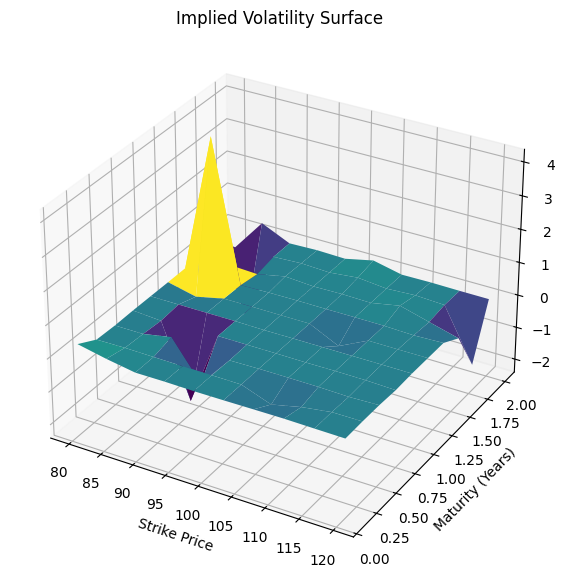

In [7]:
# --- Setup ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# --- Black-Scholes Pricing Function ---
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

# --- Implied Volatility Solver ---
def implied_volatility(S, K, T, r, market_price, option_type='call'):
    func = lambda sigma: black_scholes_price(S, K, T, r, sigma, option_type) - market_price
    try:
        return brentq(func, 1e-6, 5)
    except ValueError:
        return np.nan  # Handle if solution not found

# --- Parameters ---
S = 100       # Stock price
r = 0.01      # Risk-free rate
true_sigma = 0.25  # Assume real market volatility is 25%
option_type = 'call'

# --- Simulate Market Prices for Various Strikes and Maturities ---
strikes = np.linspace(80, 120, 10)        # 10 strike prices
maturities = np.linspace(0.1, 2.0, 10)    # 10 maturities (years)

surface = np.zeros((len(maturities), len(strikes)))

for i, T in enumerate(maturities):
    for j, K in enumerate(strikes):
        # Simulated market price using Black-Scholes
        market_price = black_scholes_price(S, K, T, r, true_sigma, option_type)
        # Estimate implied volatility back from price
        surface[i, j] = implied_volatility(S, K, T, r, market_price, option_type)

# --- Plot the Implied Volatility Surface ---
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(strikes, maturities)

ax.plot_surface(X, Y, surface, cmap='viridis', edgecolor='none')

ax.set_title('Implied Volatility Surface')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity (Years)')
ax.set_zlabel('Implied Volatility')

plt.show()


**Full Code — Implied Volatility Heatmap (2D Contour)**

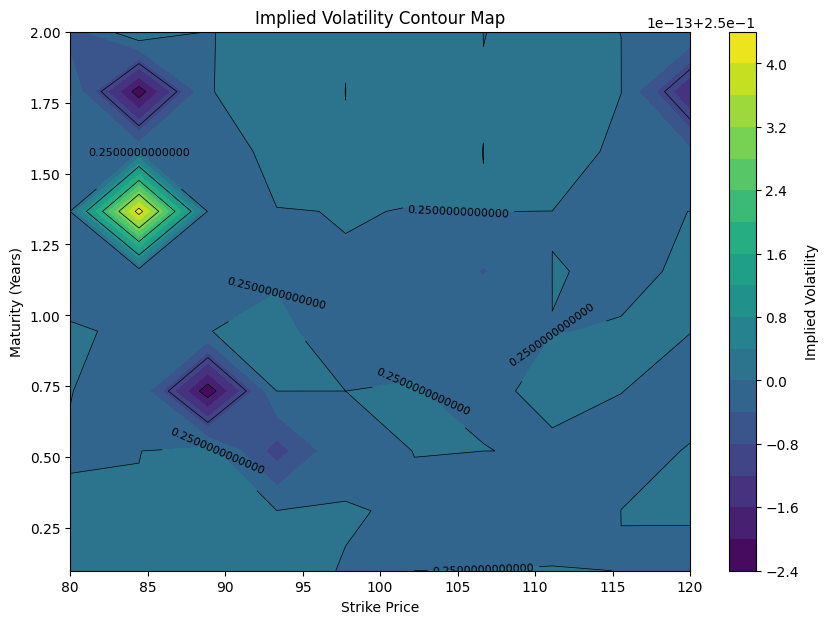

In [8]:
# --- 2D Contour / Heatmap of Implied Volatility ---

import numpy as np
import matplotlib.pyplot as plt

# Reuse X (Strikes), Y (Maturities), and surface (Implied Volatility) from before

plt.figure(figsize=(10,7))
cp = plt.contourf(X, Y, surface, cmap='viridis', levels=20)
plt.colorbar(cp, label='Implied Volatility')

# Labels
plt.title('Implied Volatility Contour Map')
plt.xlabel('Strike Price')
plt.ylabel('Maturity (Years)')

# Add optional contour lines
contours = plt.contour(X, Y, surface, colors='black', linewidths=0.5)
plt.clabel(contours, inline=True, fontsize=8)

plt.show()


**Volatility Smile and Skew Simulation**

We simulate "true" implied volatilities where:

*   At-the-money (ATM) strikes have lower volatility

*   Deep in-the-money (ITM) and deep out-of-the-money (OTM) strikes have higher volatility

*   (This happens because markets price in risks like crashes!)

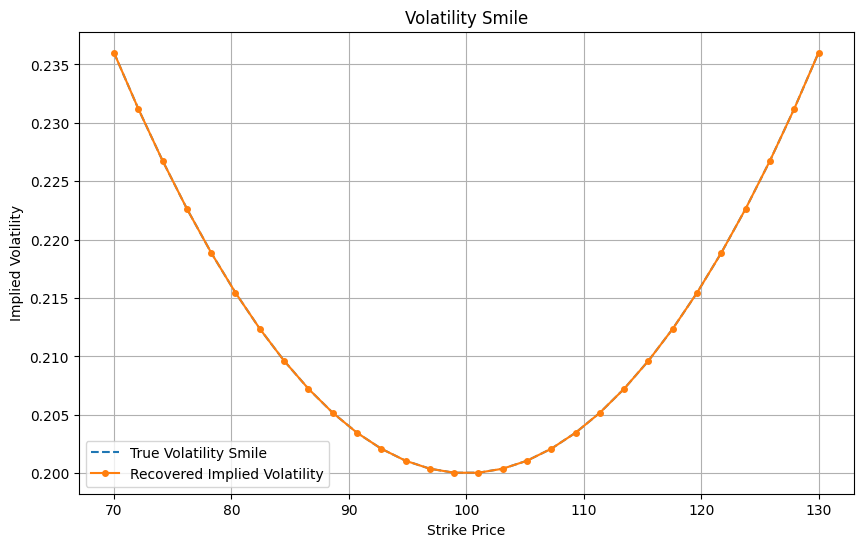

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes formula (same as before)
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Implied volatility solver (same as before)
def implied_volatility(S, K, T, r, market_price, option_type='call'):
    func = lambda sigma: black_scholes_price(S, K, T, r, sigma, option_type) - market_price
    try:
        return brentq(func, 1e-6, 5)
    except ValueError:
        return np.nan

# --- Parameters ---
S = 100          # Current stock price
r = 0.01         # Risk-free rate
T = 0.5          # 6 months to expiration
option_type = 'call'

# --- Strikes ---
strikes = np.linspace(70, 130, 30)

# --- True Volatility Smile ---
# ATM strike ~ lower vol, extreme strikes ~ higher vol
def true_volatility(K):
    moneyness = (K - S) / S
    return 0.2 + 0.4 * (moneyness)**2   # Smile-shaped function

# --- Simulate Market Prices Based on Smile ---
market_prices = []
true_vols = []

for K in strikes:
    sigma = true_volatility(K)
    true_vols.append(sigma)
    price = black_scholes_price(S, K, T, r, sigma, option_type)
    market_prices.append(price)

# --- Reverse-Engineer Implied Volatilities ---
implied_vols = []

for i, K in enumerate(strikes):
    imp_vol = implied_volatility(S, K, T, r, market_prices[i], option_type)
    implied_vols.append(imp_vol)

# --- Plotting the Smile ---
plt.figure(figsize=(10,6))
plt.plot(strikes, true_vols, label='True Volatility Smile', linestyle='--')
plt.plot(strikes, implied_vols, label='Recovered Implied Volatility', marker='o', markersize=4)
plt.title('Volatility Smile')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()
